# 处理缺失值

在pandas中，missing data呈现的方式有些缺点的，但对大部分用户能起到足够的效果。对于数值型数据，pandas用浮点值Nan(Not a Number)来表示缺失值。我们称之为识别符（sentinel value)，这种值能被轻易检测到：

In [1]:
import pandas as pd
import numpy as np

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

None值在对象数组中也被当做NA处理

In [4]:
string_data[0] = None

In [5]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

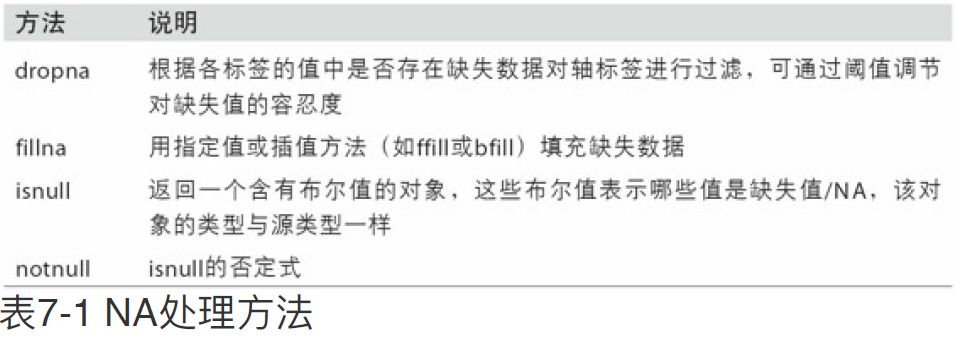

## 过滤缺失值

In [6]:
from numpy import nan as NA

In [7]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [8]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [9]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

dropna默认情况下会删除包含缺失值的行

In [10]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [11]:
cleaned = data.dropna()

In [12]:
cleaned

,0,1,2
0,1.0,6.5,3.0


设定`how=all`只会删除那些全是NA的行：

In [13]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


删除列

In [14]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [15]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


过滤DAtaFrame的行的相关方法往往涉及时间序列数据。假设只想保留包含一定数量的观察值的行可用thresh

In [16]:
df = pd.DataFrame(np.random.randn(7, 3))

In [17]:
df

,0,1,2
0,0.024010,-0.795045,-1.546213
1,0.624032,0.317882,-0.438134
2,0.162214,-0.341808,1.753528
3,0.769289,-0.051814,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


In [18]:
df.iloc[:4, 1] = NA
df

,0,1,2
0,0.024010,NaN,-1.546213
1,0.624032,NaN,-0.438134
2,0.162214,NaN,1.753528
3,0.769289,NaN,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


In [19]:
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.024010,NaN,NaN
1,0.624032,NaN,NaN
2,0.162214,NaN,1.753528
3,0.769289,NaN,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


In [20]:
df.dropna()

,0,1,2
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


In [21]:
df.dropna(thresh=2) 

,0,1,2
2,0.162214,NaN,1.753528
3,0.769289,NaN,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


## 补全缺失值

可用fillna，用一个常数来替代缺失值

In [22]:
df.fillna(0)

,0,1,2
0,0.024010,0.000000,0.000000
1,0.624032,0.000000,0.000000
2,0.162214,0.000000,1.753528
3,0.769289,0.000000,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


在调用fillna时使用字典，可以为不同列设定不同的填充值

In [23]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.024010,0.500000,0.000000
1,0.624032,0.500000,0.000000
2,0.162214,0.500000,1.753528
3,0.769289,0.500000,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


fillna返回一个新对象，但你可以使用in-place来直接更改原有的数据：

In [24]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,0.024010,0.000000,0.000000
1,0.624032,0.000000,0.000000
2,0.162214,0.000000,1.753528
3,0.769289,0.000000,0.983137
4,-1.481430,0.012570,-1.071517
5,-1.141429,1.767312,-0.476872
6,-1.308592,0.890172,-0.248262


插值法填充缺失数据

In [25]:
df = pd.DataFrame(np.random.randn(6, 3))
df

,0,1,2
0,-0.567817,-0.777273,-0.241602
1,-1.570399,-2.633264,2.688262
2,1.750623,-0.503922,1.077305
3,-0.518995,0.747268,-0.411988
4,-1.166096,-0.380262,-0.347639
5,-0.221776,-0.362681,0.404917


In [26]:
df.iloc[2:, 1] = NA
df

,0,1,2
0,-0.567817,-0.777273,-0.241602
1,-1.570399,-2.633264,2.688262
2,1.750623,NaN,1.077305
3,-0.518995,NaN,-0.411988
4,-1.166096,NaN,-0.347639
5,-0.221776,NaN,0.404917


In [27]:
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.567817,-0.777273,-0.241602
1,-1.570399,-2.633264,2.688262
2,1.750623,NaN,1.077305
3,-0.518995,NaN,-0.411988
4,-1.166096,NaN,NaN
5,-0.221776,NaN,NaN


In [28]:
df.fillna(method='ffill')

,0,1,2
0,-0.567817,-0.777273,-0.241602
1,-1.570399,-2.633264,2.688262
2,1.750623,-2.633264,1.077305
3,-0.518995,-2.633264,-0.411988
4,-1.166096,-2.633264,-0.411988
5,-0.221776,-2.633264,-0.411988


In [29]:
df.fillna(method='ffill', limit=2)  # 限制列

,0,1,2
0,-0.567817,-0.777273,-0.241602
1,-1.570399,-2.633264,2.688262
2,1.750623,-2.633264,1.077305
3,-0.518995,-2.633264,-0.411988
4,-1.166096,NaN,-0.411988
5,-0.221776,NaN,-0.411988


均值填充

In [30]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

# 数据转换

## 删除重复值

In [31]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


duplicated方法返回布尔值Series，反映每一行是否存在重复情况

In [32]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

返回不重复序列

In [33]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


duplicated和drop_duplicates默认保留第一个观测到的值。传入参数keep = 'last'将会返回最后一个

In [34]:
data.drop_duplicates(['k1','k2'],keep = 'last')

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
6,two,4


In [35]:
data.drop_duplicates(['k1'])

,k1,k2
0,one,1
1,two,1


## 使用函数或映射进行数据转换

In [36]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [37]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}

In [38]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [39]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [40]:
data['food'].map(lambda x: meat_to_animal[x.lower()])  # 等价

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## 替代值

In [41]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

这里-999可能是用来表示缺失值的标识符。用NA来替代的话，用replace，会产生一个新series（除非使用inplace=True）:

In [42]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

如果想要一次替代多个值，可以传入一个列表和替代值

In [43]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [44]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [45]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## 重命名轴索引

In [46]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


与Series类似，轴索引也有一个map方法

In [47]:
transform = lambda x: x[:4].upper()
transform

<function __main__.<lambda>(x)>

In [48]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [49]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [50]:
data.index = data.index.map(transform)

In [51]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


创建数据集转换后的版本，并且不修改原有的数据集，一个有用的方法是rename

In [52]:
data.rename(index = str.title, columns = str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


可结合字典型使用

In [53]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'pekaboo'})

,one,two,pekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


rename能让你避免陷入手动赋值给index和columns的杂务中。可以用inplace直接修改原始数据：

In [54]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## 离散化和分箱

连续值得离散化处理

In [55]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [56]:
bins = [18, 25, 35, 60, 100]

cats = pd.cut(ages, bins)

cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

返回的是一个特殊的Categorical object。我们看到的结果描述了pandas.cut如何得到bins。可以看作是一个string数组用来表示bin的名字，它内部包含了一个categories数组，用来记录不同类别的名字，并伴有表示ages的label（可以通过codes属性查看）：

In [57]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [58]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [59]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

改变封闭侧

In [60]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

传入自定义箱名

In [61]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [62]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

根据数据中的最小值和最大值计算出等长的箱

In [63]:
data = np.random.rand(20)

In [64]:
pd.cut(data,4,precision=2)  # 将十进制精度限制在两位

[(0.085, 0.29], (0.085, 0.29], (0.5, 0.71], (0.71, 0.92], (0.29, 0.5], ..., (0.71, 0.92], (0.085, 0.29], (0.5, 0.71], (0.71, 0.92], (0.085, 0.29]]
Length: 20
Categories (4, interval[float64]): [(0.085, 0.29] < (0.29, 0.5] < (0.5, 0.71] < (0.71, 0.92]]

qcut基于样本分位数进行分箱，可以获得等长的箱

In [65]:
data = np.random.randn(1000) # Normally distributed

In [66]:
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(-0.0527, 0.612], (0.612, 3.087], (-0.0527, 0.612], (-0.716, -0.0527], (-0.716, -0.0527], ..., (0.612, 3.087], (0.612, 3.087], (-0.0527, 0.612], (0.612, 3.087], (-3.029, -0.716]]
Length: 1000
Categories (4, interval[float64]): [(-3.029, -0.716] < (-0.716, -0.0527] < (-0.0527, 0.612] < (0.612, 3.087]]

In [67]:
pd.value_counts(cats)

(0.612, 3.087]       250
(-0.0527, 0.612]     250
(-0.716, -0.0527]    250
(-3.029, -0.716]     250
dtype: int64

与cut类似，可以传入自定义的分位数

In [68]:
cats2 = pd.cut(data, [0, 0.1, 0.5, 0.9, 1.]) # 累进的百分比
cats2

[NaN, (0.5, 0.9], (0.1, 0.5], NaN, NaN, ..., NaN, NaN, (0.5, 0.9], NaN, NaN]
Length: 1000
Categories (4, interval[float64]): [(0.0, 0.1] < (0.1, 0.5] < (0.5, 0.9] < (0.9, 1.0]]

In [69]:
pd.value_counts(cats2)

(0.1, 0.5]    155
(0.5, 0.9]    110
(0.0, 0.1]     35
(0.9, 1.0]     31
dtype: int64

## 检测和过滤异常值

过滤或转换异常值在很大程度上是应用数组操作的事情。考虑一个具有正态分布数据的DataFrame

In [70]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000015,0.002824,0.016664,-0.018165
std,0.976279,0.994885,1.023782,1.013411
min,-2.756796,-3.194667,-3.039985,-3.359321
25%,-0.626750,-0.642784,-0.671302,-0.704074
50%,-0.029073,-0.007274,0.013584,-0.009963
75%,0.666897,0.656775,0.710046,0.634343
max,2.881826,3.336948,3.510572,2.770255


In [71]:
col = data[2]
col.head()  

0    0.639514
1    0.577983
2   -0.742051
3   -0.140915
4    1.767504
Name: 2, dtype: float64

In [72]:
col[np.abs(col) > 3]  ##找出一列中绝对值大于3的值

76     3.046237
187    3.510572
336    3.048870
734   -3.039985
Name: 2, dtype: float64

选出绝对值大于三的数的一行

In [73]:
data[(np.abs(data) > 3).any(1)] # any中axis=1表示column

,0,1,2,3
30,0.931691,-0.991074,-0.542937,-3.117775
76,-0.626481,2.559029,3.046237,0.927148
187,-0.465797,0.273252,3.510572,0.915104
223,-1.652810,3.336948,-0.517864,1.059673
273,1.174416,3.071119,0.225378,-0.978053
336,-0.966336,-1.493560,3.048870,0.739065
444,-0.259588,-3.184004,-0.641602,0.634336
630,-0.482750,3.080092,0.044858,-0.199785
672,-1.327948,-3.194667,-1.593444,-0.379455
693,1.175008,-0.088960,1.446796,-3.359321


限制值的范围：

In [74]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [75]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000015,0.002714,0.016098,-0.017380
std,0.976279,0.992166,1.021765,1.010998
min,-2.756796,-3.000000,-3.000000,-3.000000
25%,-0.626750,-0.642784,-0.671302,-0.704074
50%,-0.029073,-0.007274,0.013584,-0.009963
75%,0.666897,0.656775,0.710046,0.634343
max,2.881826,3.000000,3.000000,2.770255


## 置换和随机抽样

使用numpy.random.permutation对DataFrame中的Series或行进行置换（随即重排序）是非常方便的。在调用permutation时根据你想要的轴长度可以产生一个表示重新顺序的整数数组

In [76]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [77]:
sampler = np.random.permutation(5)
sampler

array([3, 0, 4, 2, 1])

In [78]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
0,0,1,2,3
4,16,17,18,19
2,8,9,10,11
1,4,5,6,7


选出没有替换功能的随机子集

In [79]:
df.sample(n=3)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15


## 计算指标/虚拟变量

> Dummy Variables：虚拟变量，又称虚设变量、名义变量或哑变量,用以反映质的属性的一个人工变量,是量化了的自变量,通常取值为0或1。

另一种在统计模型上的转换或机器学习应用是把一个categorical variable(类别变量)变为一个dummy or indicator matrix（虚拟或指示器矩阵）。如果DataFrame中的一列有k个不同的值，我们可以用一个矩阵或DataFrame用k列来表示，1或0。pandas有一个get_dummies函数实现这个工作，当然，你自己设计一个其实也不难。这里举个例子：

In [80]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [81]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


在DataFrame的列上加入前缀，然后与其他数据合并

In [83]:
dummies = pd.get_dummies(df['key'],prefix='key')

In [84]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [86]:
df_with_dummy = df[['data1']].join(dummies)

In [87]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [88]:
mnames = ['movie_id','title','genres']  # 我不相信这一切了

如果DataFrame的一行属于多个类别

In [89]:
movies = pd.read_table('datasets/movielens/movies.dat',sep = '::',header = None, names = mnames)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [91]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [98]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))

In [99]:
genres = pd.unique(all_genres)

In [100]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [101]:
zero_matrix = np.zeros((len(movies),len(genres)))

In [102]:
dummies = pd.DataFrame(zero_matrix,columns = genres)

In [103]:
gen = movies.genres[0]

In [104]:
gen

"Animation|Children's|Comedy"

In [105]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [108]:
for i,gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i,indices] = 1

将get_dummies与cut等离散化函数结合使用时统计应用的一个有用方法

In [110]:
np.random.seed(12345)

In [111]:
values = np.random.rand(10)

In [112]:
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [113]:
bins = [0,0.2,0.4,0.6,0.8,1]

In [114]:
pd.get_dummies(pd.cut(values, bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

# 字符串操作

## 字符串对象方法

In [115]:
val = 'a,b, guido'

In [116]:
val.split(',')

['a', 'b', ' guido']

In [117]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

可以使用+号把::和字符串连起来：

In [118]:
first, second, third = pieces

In [119]:
first + '::' + second + '::' + third

'a::b::guido'

但这种方法并不python，更快的方法是直接用join方法：

In [120]:
'::'.join(pieces)

'a::b::guido'

定位子字符串

In [121]:
val.index(',')

1

In [122]:
val.find(':')

-1

注意index和find的区别。如果要找的string不存在的话，index会报错。而find会返回-1:

In [123]:
val.index(':')

ValueError: substring not found

count会返回一个子串出现的次数：

In [124]:
val.count(',')

2

replace将会用一种模式替代另一种模式。通常也用于传入空字符串来删除某个模式

In [125]:
val.replace(',','::')

'a::b:: guido'

In [126]:
val.replace(',','')

'ab guido'

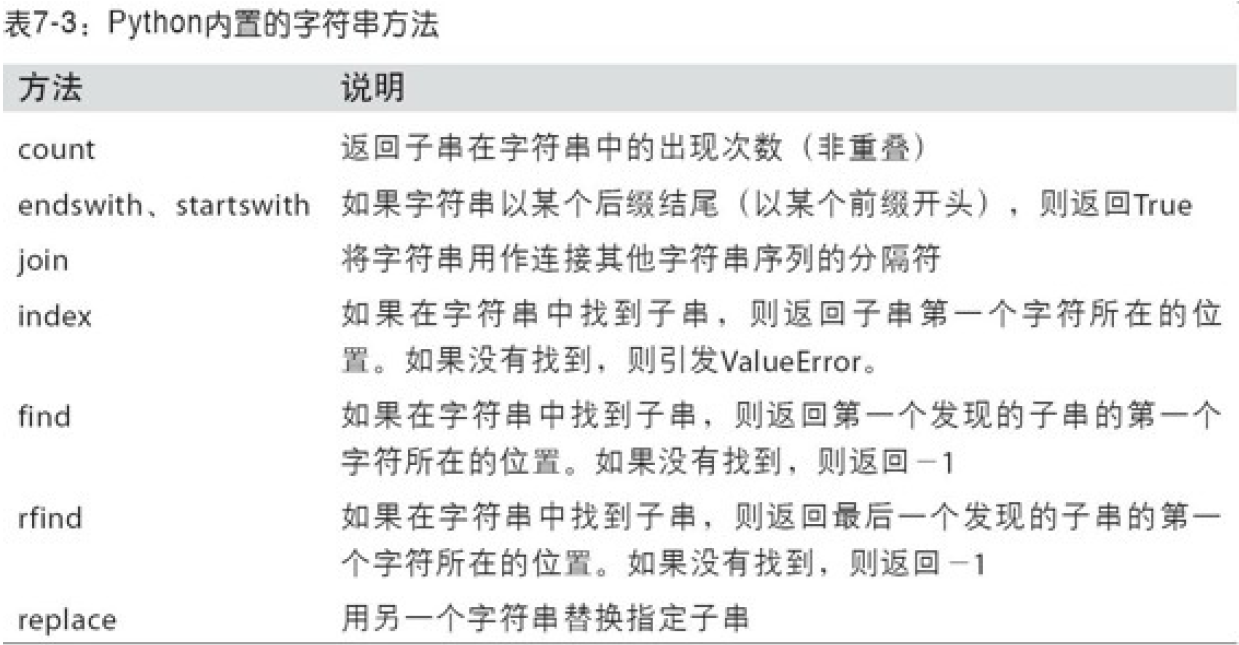

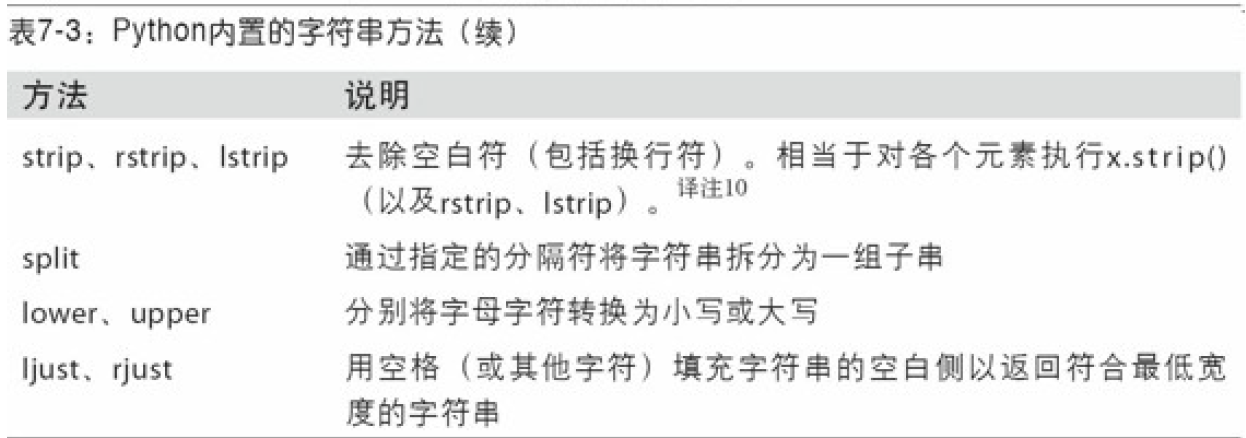

## 正则表达式

描述一个或多个字符串的正则表达式：\s+

In [127]:
import re

In [128]:
text = "foo    bar\t baz  \tqux"

In [129]:
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

当调用`re.split('\s+', text)`的时候，正则表达式第一次被compile编译，并且split方法会被调用搜索text。我们可以自己编译regex，用re.compile，可以生成一个可以多次使用的regex object：

In [130]:
regex = re.compile('\s+')

In [131]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

如果想要得到符合regex的所有结果，以一个list结果返回，可以使用findall方法：

In [132]:
regex.findall(text)

['    ', '\t ', '  \t']

> 为了防止\在正则表达式中的逃逸，推荐使用raw string literal，比如`r'C:\x'`，而不是使用`'C:\\x`

使用re.compile创建一个regex object是被强烈推荐的，如果你打算把一个表达式用于很多string上的话，这样可以节省CPU的资源。

match和search，与findall关系紧密。不过findall会返回所有匹配的结果，而search只会返回第一次匹配的结果。更严格地说，match只匹配string开始的部分。这里举个例子说明，我们想要找到所有的邮件地址：

In [133]:
text = """Dave dave@google.com 
          Steve steve@gmail.com 
          Rob rob@gmail.com 
          Ryan ryan@yahoo.com """

pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [134]:
# re.IGNORECASE makes the regex case-insensitive 
regex = re.compile(pattern, flags=re.IGNORECASE)

In [135]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

search返回text中的第一个匹配结果。match object能告诉我们找到的结果在text中开始和结束的位置：

In [136]:
m = regex.search(text)

In [137]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [138]:
text[m.start():m.end()]

'dave@google.com'

regex.match返回None，因为它只会在pattern存在于stirng开头的情况下才会返回匹配结果：

In [139]:
print(regex.match(text))

None


而sub返回一个新的string，把pattern出现的地方替换为我们指定的string：

In [140]:
print(regex.sub('REDACTED', text))

Dave REDACTED 
          Steve REDACTED 
          Rob REDACTED 
          Ryan REDACTED 


假设你想要找到邮件地址，同时，想要把邮件地址分为三个部分，username, domain name, and domain suffix.（用户名，域名，域名后缀）。需要给每一个pattern加一个括号：

In [141]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [142]:
regex = re.compile(pattern, flags=re.IGNORECASE)

由这个修改后的正则表达式产生的匹配对象的group方法，返回的是模式组件的元组：

In [143]:
m = regex.match('wesm@bright.net')

In [145]:
m.groups()

('wesm', 'bright', 'net')

当模式可以分组时，findall返回的是包含元组的列表

In [146]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

sub也可以使用特殊符号，如\1,\2访问每个匹配对象中的分组

In [147]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com 
          Steve Username: steve, Domain: gmail, Suffix: com 
          Rob Username: rob, Domain: gmail, Suffix: com 
          Ryan Username: ryan, Domain: yahoo, Suffix: com 


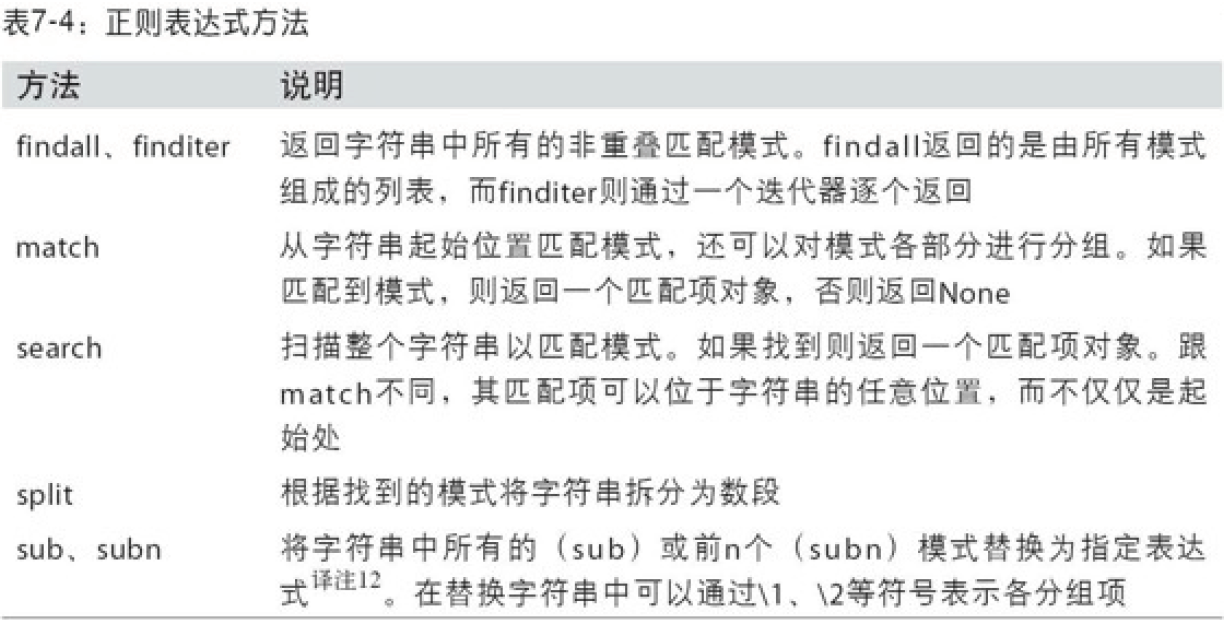

## pandas中的向量化字符串函数

包含字符串的列有时会含有缺失数据，使事情变得复杂

In [148]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [149]:
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [150]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

你可以使用data.map将字符串和有效的正则表达式方法（以lambda或其它函数的方式传递）应用到每个值上，但在NA（null）值上会失败。为了解决这个问题，Series有面向数组的方法用于跳过NA值的字符串操作。这些方法通过Series的str属性进行调用。例如，可以用以下方法来检查每个电子邮件地址是否含有'gmail'


In [151]:
data.str

In [152]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

正则表达式也可以用，配合任意的re选项，比如IGNORECASE：

In [153]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [154]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

有多种方法可以进行向量化的元素检索。可以使用str.get，或在str属性内部索引

In [156]:
matches = data.str.match(pattern, flags = re.IGNORECASE)

In [157]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [160]:
matches.str.get(1)  # ???没看懂

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [161]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

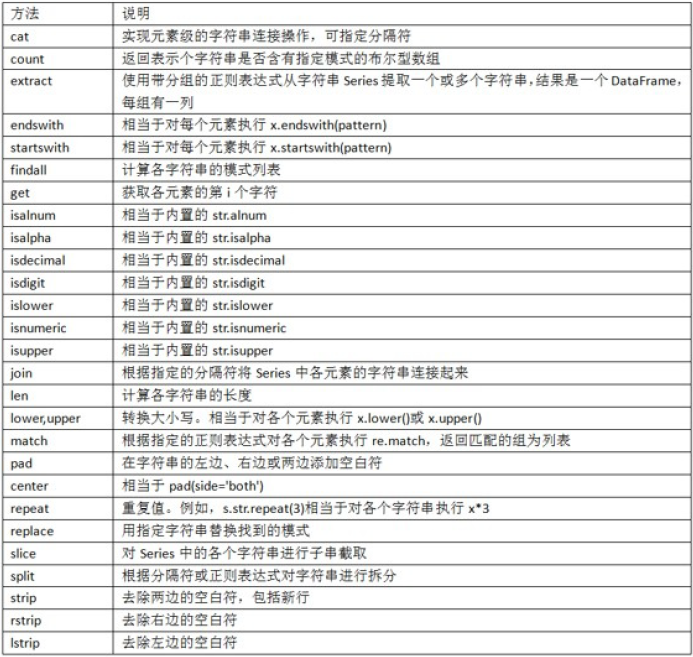